# Introduction

**Aim of the project:**<br> This is an analysis of the Boston Housing Dataset. In it I will describe the dataset using descriptive statistics, conduct some inferential statistical analysis to determine whether there is a significnat difference in house prices between houses along the Charles river and those that are not. Finally I will create a neural network using keras to predict the median house price based on the other variables in the dataset.

**Background - what is the Boston Housing Dataset?:**<br>
The Boston Housing Dataset was originally published by Harrisson & Rubenfeld in 1978, in order to determine whether or not clean air had an impact on house prices in Boston.


## Part 1 - Describe

### Preliminary investigations:


In [75]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
%matplotlib inline

In [76]:
#import Boston House Prices dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

In [77]:
#Assign variable 'boston' to the dataset
boston = load_boston()

In [78]:
#take a look at the dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [79]:
#That doesn't look good! Lets create a pandas dataframe from this data
#create pandas dataframe
df = pd.DataFrame(boston.data, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'])

In [80]:
#We need to add the median value to the dataframe
df['MEDV'] = boston.target

From research online 16 datapoints have a 'medv' of 50. We will remove these as they likely contain missing or censored values.

In [81]:
df = df[df.MEDV !=50]

In [82]:

#We'll take a look at the first 20 rows
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## What do the headings mean?


In [83]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [84]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

No null values found.

The 'medv' variable is our target variable, as it reflects the price of the property.

<function matplotlib.pyplot.show(*args, **kw)>

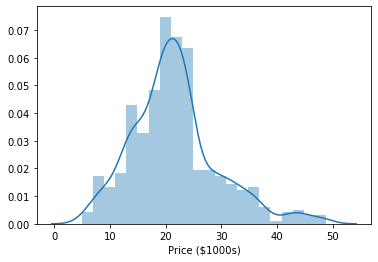

In [85]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show


We can see from the above plot that the medv variable broadly follows a normal distribution, with some outliers. 

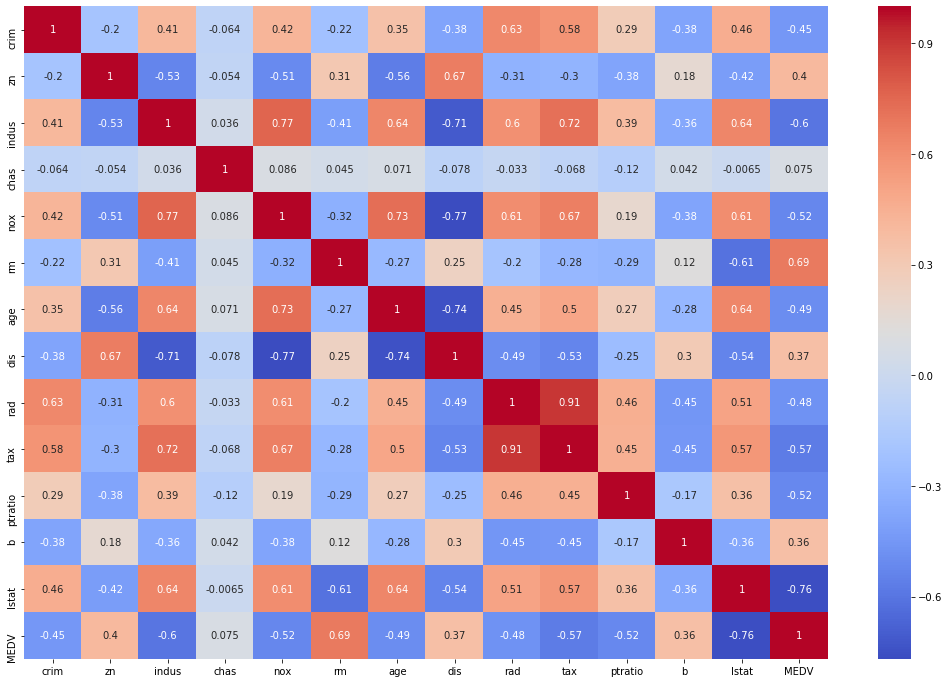

In [86]:

#show correlation between variables
ax, fig = plt.subplots(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()
#blues show a negative correlation, oranges/reds a positive one

From the plot above we can see that the variable with the strongest positive correlation is no. of rooms, and the one with the strongest negative correlation is % of lower status of population. Intuitively it is reasonable that houses with more rooms would cost more, likewise it is a fair assumption that areas with a higher proportion of lower socio-economic residents would have lower prices housing on average. From this there doesn't appear to be a strong correlation between the 'CHAS' variable and house prices.

Finally in this section we'll take a look at the prices variable


In [87]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
prices.describe()
#features.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

### Part 2 - Inferential Statistics

The aim of this section is to determine whether there is a significant difference in median prices of houses that are along the Charles river and those that are not. The Null Hypothesis will be that there is no difference between house prices whether or not they are along the Charles River. Lets take a look at the variable 'chas' which is the indicator as to whether the house lies along the river or not. '1' means it does, '0' means it does not.

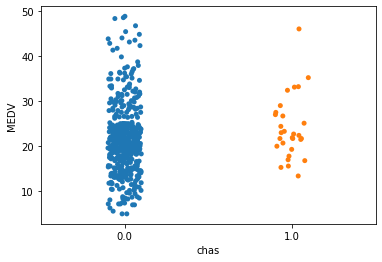

In [88]:
sns.stripplot(x="chas", y = 'MEDV', data = df)



From observing the scatterplot above we can see that there are much fewer properties bordering the Charles river than properties that don't border it; it also looks like the highest priced properties are away from the river.

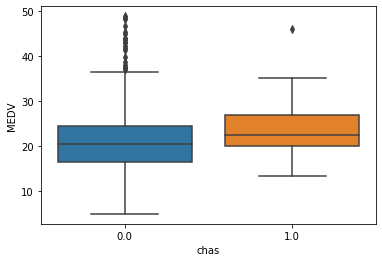

In [89]:
sns.boxplot(x = "chas", y = "MEDV", data = df)

From the boxplot above we can see that there are a lot of outliers in the properties not bordering the river, and the median price of houses bordering the river appears greater than that of houses not bordering it.
Our null hypothesis is that there is statistically no differenct between the median prices of houses that border the Charles River and those that dont'. Our alternative hypothesis is that there is a statistically significant difference between the median prices of houses that border the Charles river and those that don't. Lets seperate the variable into its components

In [90]:
for col in df.columns:
    print(col)
charles = df.drop(['crim','rm','dis','zn','indus','nox','age','rad','tax','ptratio','b','lstat'], axis =1)






crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
b
lstat
MEDV


In [91]:
#group data in chas variable by 1 or 0, either bordering the river or not
group = charles.groupby('chas')
#look at this dataframe
group.describe().head()
#isolate medv


MEDV                                                   
      count       mean       std   min   25%   50%   75%   max
chas                                                          
0.0   461.0  21.488503  7.898848   5.0  16.5  20.6  24.5  48.8
1.0    29.0  23.979310  7.024161  13.4  20.0  22.4  27.0  46.0

### Part 3 - Predict

The aim of this section is to use keras to create a neural network that can predict the median house price based on other variables in the dataset. 

In [92]:
import tensorflow as tf
import keras as kr
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# For preprocessing data.
import sklearn.preprocessing as pre
x = df[['crim', 'zn','indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['MEDV']
x



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [93]:
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [94]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

Building & training:

In [95]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [96]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
392/392 [==============================] - 0s 412us/step - loss: 37654.2991
Epoch 2/100
392/392 [==============================] - 0s 94us/step - loss: 6493.0910
Epoch 3/100
392/392 [==============================] - 0s 94us/step - loss: 903.4382
Epoch 4/100
392/392 [==============================] - 0s 84us/step - loss: 383.6316
Epoch 5/100
392/392 [==============================] - 0s 89us/step - loss: 207.4643
Epoch 6/100
392/392 [==============================] - 0s 92us/step - loss: 124.0694
Epoch 7/100
392/392 [==============================] - 0s 89us/step - loss: 92.1213
Epoch 8/100
392/392 [==============================] - 0s 87us/step - loss: 79.3807
Epoch 9/100
392/392 [==============================] - 0s 92us/step - loss: 74.5171
Epoch 10/100
392/392 [==============================] - 0s 87us/step - loss: 70.9632
Epoch 11/100
392/392 [==============================] - 0s 84us/step - loss: 67.4631
Epoch 12/100
392/392 [==============================] - 0s 87us/

In [97]:
m.predict(x_test).round().T

array([[24., 26., 31., 23., 19., 17., 12., 20., 27., 17., 15., 20., 25.,
        25., 15., 23., 26., 19., 23., 20., 34., 28., 18., 29., 22., 18.,
        19., 26., 30., 18., 15., 27., 19., 22., 28., 27., 15., 18., 22.,
        26., 26., 29., 18.,  8., 17., 29., 32., 31., 18., 18., 23., 14.,
        24., 22., 30., 27., 26., 21., 27., 10., 10., 10., 16., 26., 14.,
        33., 21., 27., 26., 16., 17., 16., 31., 20., 17., 22., 27., 19.,
        32., 11., 26., 17., 23., 22., 23., 23., 25., 16., 30., 16., 18.,
        21., 27.,  9., 10., 30., 25., 19.]], dtype=float32)

In [98]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([21. , 27.5, 45.4, 22.2, 23.1, 14.6,  7.5, 21.7, 22.6, 14.3, 15.6,
       17.8, 22.8, 19.4,  8.3, 20.4, 20.7, 13.8, 17.1, 18.4, 48.5, 30.5,
       17.8, 29.8, 27.5, 12.7, 20. , 20.4, 24.7, 18.3, 11.7, 26.5, 19.1,
       20.1, 20.6, 18.9, 23.1, 16.4, 20.8, 24.8, 23.8, 24.6, 15.1, 17.9,
       14.1, 31.5, 43.5, 43.1, 15. , 12.6, 21.2, 15.4, 16.5, 15.6, 23.9,
       20.7, 19.3, 18.8, 25. , 15. , 17.8, 19.4,  6.3, 26.2, 14.8, 34.9,
       20.5, 23.1, 23.3, 14.5, 17.1,  7.2, 34.9, 16.6, 11.5, 25. , 22.5,
       20.3, 33.4, 10.4, 23.7, 16.7, 23.3, 17.4, 21.7, 21.2, 21.1, 11.3,
       44.8, 17. , 15.2, 27.1, 31.6, 15.6,  5. , 24.1, 23.2, 16.1],
      dtype=float32)

In [99]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 2ms/step


27.29451730299969

It is good practice to normalise the data, as the values all have different ranges. For each feature we subtract the mean and divide by the standart deviation of the feature so that the feature is centered around zero. We can do this with keras: 

In [100]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [101]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(64, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [106]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
392/392 [==============================] - 0s 201us/step - loss: 5.5982
Epoch 2/100
392/392 [==============================] - 0s 209us/step - loss: 5.5224
Epoch 3/100
392/392 [==============================] - 0s 191us/step - loss: 5.5261
Epoch 4/100
392/392 [==============================] - 0s 186us/step - loss: 5.4581
Epoch 5/100
392/392 [==============================] - 0s 188us/step - loss: 5.4396
Epoch 6/100
392/392 [==============================] - 0s 193us/step - loss: 5.3968
Epoch 7/100
392/392 [==============================] - 0s 204us/step - loss: 5.4264
Epoch 8/100
392/392 [==============================] - 0s 196us/step - loss: 5.4578
Epoch 9/100
392/392 [==============================] - 0s 196us/step - loss: 5.3407
Epoch 10/100
392/392 [==============================] - 0s 198us/step - loss: 5.4001
Epoch 11/100
392/392 [==============================] - 0s 127us/step - loss: 5.3513
Epoch 12/100
392/392 [==============================] - 0s 97us/step - los

392/392 [==============================] - 0s 211us/step - loss: 4.0639
Epoch 99/100
392/392 [==============================] - 0s 214us/step - loss: 4.1007
Epoch 100/100
392/392 [==============================] - 0s 224us/step - loss: 4.2108


In [109]:
m.predict(x_test).round().T

array([[206., 273., 277., 201., 332., 356., 418., 257., 250., 454., 176.,
        195., 281., 221., 334., 237., 241., 385., 244., 254., 286., 278.,
        358., 281., 425., 368., 151., 277., 210., 211., 455., 294., 221.,
        166., 357., 261., 439., 364., 327., 342., 235., 265., 370., 384.,
        359., 285., 274., 188., 368., 366., 288., 178., 279., 186., 241.,
        348., 344., 216., 317., 470., 151., 144., 328., 327., 123., 323.,
        218., 298., 298., 451., 351., 341., 236., 202., 350., 425., 222.,
        252., 244., 402., 319., 349., 273., 280., 299., 285., 280., 334.,
        276., 192., 353., 144., 251., 160., 272., 189., 288., 376.]],
      dtype=float32)

In [104]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([21. , 27.5, 45.4, 22.2, 23.1, 14.6,  7.5, 21.7, 22.6, 14.3, 15.6,
       17.8, 22.8, 19.4,  8.3, 20.4, 20.7, 13.8, 17.1, 18.4, 48.5, 30.5,
       17.8, 29.8, 27.5, 12.7, 20. , 20.4, 24.7, 18.3, 11.7, 26.5, 19.1,
       20.1, 20.6, 18.9, 23.1, 16.4, 20.8, 24.8, 23.8, 24.6, 15.1, 17.9,
       14.1, 31.5, 43.5, 43.1, 15. , 12.6, 21.2, 15.4, 16.5, 15.6, 23.9,
       20.7, 19.3, 18.8, 25. , 15. , 17.8, 19.4,  6.3, 26.2, 14.8, 34.9,
       20.5, 23.1, 23.3, 14.5, 17.1,  7.2, 34.9, 16.6, 11.5, 25. , 22.5,
       20.3, 33.4, 10.4, 23.7, 16.7, 23.3, 17.4, 21.7, 21.2, 21.1, 11.3,
       44.8, 17. , 15.2, 27.1, 31.6, 15.6,  5. , 24.1, 23.2, 16.1],
      dtype=float32)

In [105]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 1ms/step


587317.1645408163

That didn't give us much of an improvement. The next step is to try whitening the data, i.e. removing any underlying correlations. Whitening:

In [40]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.905120,0.078485,1.091229,0.072739,0.159867,-0.348874,0.775875,-0.839656,-0.045127,-1.754839,0.203550,3.928843,-0.753797
1,1.393566,-1.502937,0.219453,-0.420948,-0.595231,-0.640905,0.016712,-0.977225,0.054588,0.367922,-0.112303,-0.290821,1.151415
2,-0.469237,-0.234617,2.670905,1.207396,-0.157138,0.246304,0.473832,0.231439,-0.457136,-1.053994,1.081100,-0.075144,-0.554639
3,0.351471,2.262088,-0.964279,0.715998,-0.760948,0.316522,1.559161,0.517176,-1.721390,0.485326,1.032146,-0.648936,2.877774
4,0.146333,-0.608172,-0.971641,0.597754,-0.949758,0.183827,2.286107,0.627420,1.615361,-0.215108,-0.829597,-0.342233,0.133934
5,1.407726,-1.504622,-0.306600,0.364322,1.609946,2.793293,-1.968159,-0.365434,-0.631113,-0.868171,1.392660,-0.090673,-0.776556
6,-1.018626,0.192299,0.785936,-2.804556,0.495558,0.757613,0.239974,-0.311939,-0.421812,0.169055,-0.049695,-0.226947,0.421787
7,0.109836,-0.579521,-0.521100,-0.050801,-0.787146,-0.782343,0.030160,1.605245,-0.438594,-0.289457,0.773392,-0.202091,-0.633875
8,2.083859,3.309442,0.234375,-0.032849,-1.202677,-0.802184,-0.242164,-0.581045,0.395409,0.229003,-0.972273,-0.175855,0.561388
9,-0.768037,-0.001336,-0.912716,-0.041086,-0.114456,-0.304343,0.964690,0.292352,1.544035,-1.449393,0.468669,-0.240654,0.800233


In [41]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))


m.compile(loss="mean_squared_error", optimizer="adam")

In [58]:
history = m.fit(x_train_white, y_train, epochs=400, batch_size=8)

Epoch 1/400
392/392 [==============================] - 0s 114us/step - loss: 54.6235
Epoch 2/400
392/392 [==============================] - 0s 125us/step - loss: 14.9801
Epoch 3/400
392/392 [==============================] - 0s 122us/step - loss: 10.7720
Epoch 4/400
392/392 [==============================] - 0s 109us/step - loss: 8.7136
Epoch 5/400
392/392 [==============================] - 0s 114us/step - loss: 7.5058
Epoch 6/400
392/392 [==============================] - 0s 112us/step - loss: 6.8550
Epoch 7/400
392/392 [==============================] - 0s 114us/step - loss: 6.0825
Epoch 8/400
392/392 [==============================] - ETA: 0s - loss: 5.545 - 0s 104us/step - loss: 6.0221
Epoch 9/400
392/392 [==============================] - 0s 112us/step - loss: 5.3378
Epoch 10/400
392/392 [==============================] - 0s 117us/step - loss: 4.9734
Epoch 11/400
392/392 [==============================] - 0s 109us/step - loss: 4.6446
Epoch 12/400
392/392 [=========================

392/392 [==============================] - 0s 249us/step - loss: 0.1963
Epoch 193/400
392/392 [==============================] - 0s 244us/step - loss: 0.2656
Epoch 194/400
392/392 [==============================] - 0s 237us/step - loss: 0.2385
Epoch 195/400
392/392 [==============================] - 0s 234us/step - loss: 0.2650
Epoch 196/400
392/392 [==============================] - 0s 120us/step - loss: 0.2143
Epoch 197/400
392/392 [==============================] - 0s 117us/step - loss: 0.1560
Epoch 198/400
392/392 [==============================] - 0s 120us/step - loss: 0.1846
Epoch 199/400
392/392 [==============================] - 0s 107us/step - loss: 0.2143
Epoch 200/400
392/392 [==============================] - 0s 107us/step - loss: 0.3242
Epoch 201/400
392/392 [==============================] - 0s 104us/step - loss: 0.2223
Epoch 202/400
392/392 [==============================] - 0s 120us/step - loss: 0.1935
Epoch 203/400
392/392 [==============================] - 0s 140us/st

392/392 [==============================] - 0s 247us/step - loss: 0.1404
Epoch 383/400
392/392 [==============================] - 0s 252us/step - loss: 0.1342
Epoch 384/400
392/392 [==============================] - 0s 247us/step - loss: 0.1148
Epoch 385/400
392/392 [==============================] - 0s 270us/step - loss: 0.0929
Epoch 386/400
392/392 [==============================] - 0s 247us/step - loss: 0.0769
Epoch 387/400
392/392 [==============================] - 0s 262us/step - loss: 0.1419
Epoch 388/400
392/392 [==============================] - 0s 267us/step - loss: 0.1369
Epoch 389/400
392/392 [==============================] - 0s 265us/step - loss: 0.1794
Epoch 390/400
392/392 [==============================] - 0s 260us/step - loss: 0.2105
Epoch 391/400
392/392 [==============================] - 0s 287us/step - loss: 0.1486
Epoch 392/400
392/392 [==============================] - 0s 260us/step - loss: 0.1770
Epoch 393/400
392/392 [==============================] - 0s 237us/st

In [64]:
m.predict(x_test).round().T

array([[680., 861., 870., 912., 811., 652., 749., 489., 873., 583., 670.,
        653., 729., 632., 498., 679., 913., 865., 487., 594., 702., 743.,
        611., 752., 799., 670., 877., 604., 589., 674., 713., 639., 774.,
        664., 614., 717., 751., 590., 861., 603., 606., 828., 797., 488.,
        685., 693., 658., 560., 573., 731., 903., 615., 600., 684., 878.,
        855., 659., 762., 587., 911., 838., 901., 722., 622., 862., 540.,
        763., 708., 850., 685., 716., 579., 839., 614., 578., 667., 544.,
        658., 737., 588., 666., 661., 698., 840., 752., 710., 709., 558.,
        656., 589., 593., 706., 528., 717., 714., 712., 673., 775.]],
      dtype=float32)

In [60]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([15. , 20.1, 20. , 20.6, 13.9, 36.2, 20.1, 34.9, 12.5, 22.2, 18.7,
       20.7, 21.7, 36.5, 19.4, 24.4, 21.2, 15.1, 42.3, 36.4, 23.6, 20.3,
       24.4, 19.7, 14.9, 29.4, 21.4, 14.1, 11.8, 24.2, 37.6, 24. , 14.6,
       18.5, 14.5, 21.6, 21.2, 33.1,  8.5, 24.8,  8.4,  7.4, 27.9, 31.1,
       23.6, 23.8, 21.2, 23.7, 17.1, 23.1, 15.2, 25. , 19. , 38.7, 19.6,
       19.9, 17.2, 20.8, 13.5, 20.1, 19.9, 20.6, 22.8, 15.7, 25. ,  8.8,
       23.3, 16.5,  7.2, 27.1,  8.5,  9.6, 14.6, 22. , 28.2, 24.7, 23.8,
       20.9, 16.4, 46. , 36.2, 17.4, 18.4, 16.8, 24.1, 23.1, 21.7, 25. ,
       22. , 25.2, 30.5, 44.8, 24.8, 26.7, 19.3, 21.7, 22. , 17.4],
      dtype=float32)

In [61]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 71us/step


470813.5605867347

In [62]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss'])


KeyError: 'accuracy'

#### References:

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 <br> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html <br>
Chollet, F. 2018 *Deep Learning With Python*, Manning Publication Co., NY <br>
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/<br>
Harrison Jr, David, & Rubenfeld, Daniel, 1978, '*Hedonic Housing Prices and the Demand for Clean Air*', Journal of Environmental Economics & Management 5, 81-102